In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import coo_matrix, csr_matrix
import time

In [4]:
df = pd.read_csv('supersymmetry_dataset.csv')

In [6]:
features = df.drop(columns='SUSY').columns.tolist()
print(features)

['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']


In [8]:
def handle_outliers(df, columns):
    for col in columns:
        # Calculate Q1 and Q3
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [10]:
df_cleaned=handle_outliers(df,features)
#print(df_cleaned)

In [12]:
y = df_cleaned['SUSY']
features_df = df_cleaned.drop(columns='SUSY')

In [14]:
features = features_df.columns
X = features_df[features]

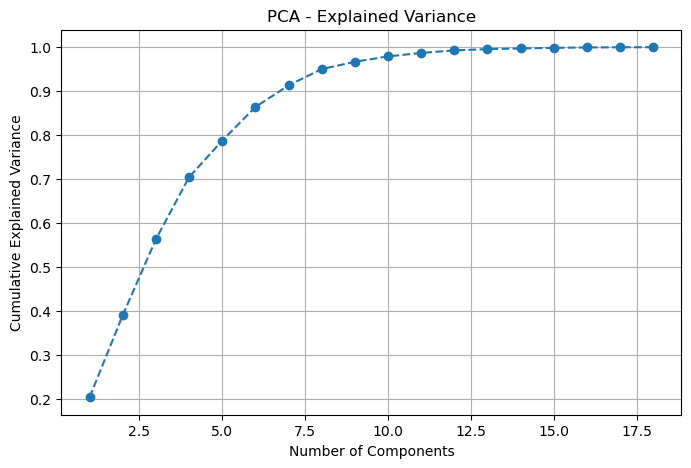

In [15]:
# Fit PCA without specifying n_components
pca_full = PCA()
pca_full.fit(X)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

In [17]:
# Select the number of components that explain at least 95% of the variance
threshold = 0.95
n_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of components to retain {threshold*100}% variance: {n_components}")


Number of components to retain 95.0% variance: 8


In [19]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative explained variance: {explained_variance.cumsum()}")

Explained variance ratio: [0.20319167 0.18674741 0.17284512 0.14134141 0.0831787  0.07649934
 0.04926588 0.03713768]
Cumulative explained variance: [0.20319167 0.38993907 0.5627842  0.70412561 0.78730431 0.86380365
 0.91306954 0.95020722]


In [19]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression


# Train logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.6990491395363335
              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79    483960
         1.0       0.61      0.35      0.44    253898

    accuracy                           0.70    737858
   macro avg       0.67      0.62      0.62    737858
weighted avg       0.68      0.70      0.67    737858



In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7522544988331088
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83    483960
         1.0       0.70      0.49      0.58    253898

    accuracy                           0.75    737858
   macro avg       0.73      0.69      0.70    737858
weighted avg       0.75      0.75      0.74    737858



In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42, max_iter=500)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Accuracy: 0.6467450376630733
              precision    recall  f1-score   support

         0.0       0.67      0.93      0.77    483960
         1.0       0.45      0.11      0.18    253898

    accuracy                           0.65    737858
   macro avg       0.56      0.52      0.48    737858
weighted avg       0.59      0.65      0.57    737858



In [24]:
X_scaled = (X - X.mean()) / X.std()

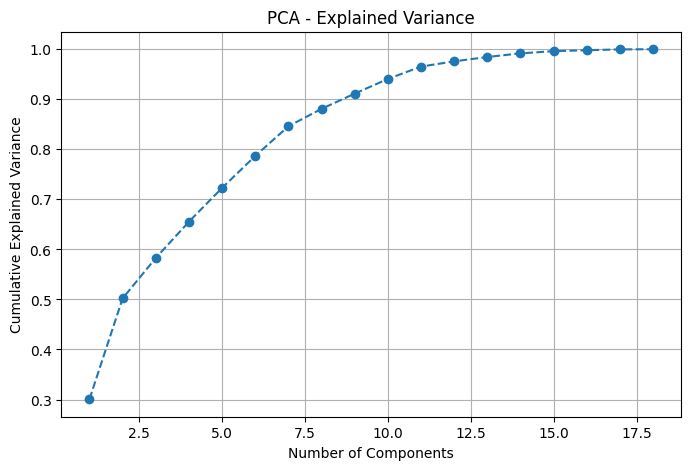

In [27]:
# Fit PCA without specifying n_components
pca_full = PCA()
pca_full.fit(X_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

In [28]:
# Select the number of components that explain at least 95% of the variance
threshold = 0.95
n_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of components to retain {threshold*100}% variance: {n_components}")


Number of components to retain 95.0% variance: 11


In [29]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative explained variance: {explained_variance.cumsum()}")

Explained variance ratio: [0.3006247  0.2014868  0.08071989 0.07248921 0.0675249  0.06385412
 0.05928735 0.03488595 0.03039283 0.02932781 0.02471426]
Cumulative explained variance: [0.3006247  0.5021115  0.58283139 0.6553206  0.7228455  0.78669962
 0.84598697 0.88087293 0.91126576 0.94059356 0.96530782]


In [31]:
from sklearn.linear_model import LogisticRegression

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7543348449159595
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83    483960
         1.0       0.71      0.48      0.57    253898

    accuracy                           0.75    737858
   macro avg       0.74      0.69      0.70    737858
weighted avg       0.75      0.75      0.74    737858



In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7722258212284748
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84    483960
         1.0       0.73      0.54      0.62    253898

    accuracy                           0.77    737858
   macro avg       0.76      0.72      0.73    737858
weighted avg       0.77      0.77      0.76    737858



In [33]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42, max_iter=100)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Accuracy: 0.6191435208400532
              precision    recall  f1-score   support

         0.0       0.65      0.92      0.76    483960
         1.0       0.23      0.05      0.08    253898

    accuracy                           0.62    737858
   macro avg       0.44      0.48      0.42    737858
weighted avg       0.51      0.62      0.53    737858



In [16]:
features_df.drop(columns=['lepton 1 eta', 'lepton 1 phi','axial MET','lepton 2 eta', 'lepton 2 phi', 'missing energy phi'], inplace=True)

In [18]:
features_df.drop(columns=['S_R','MT2'], inplace=True)

In [20]:
features = features_df.columns
X = features_df[features]

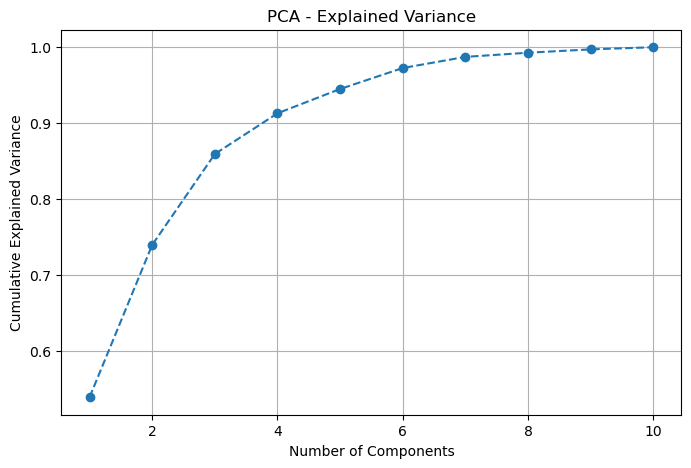

In [21]:
# Fit PCA without specifying n_components
pca_full = PCA()
pca_full.fit(X)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

In [23]:
# Select the number of components that explain at least 95% of the variance
threshold = 0.95
n_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of components to retain {threshold*100}% variance: {n_components}")


Number of components to retain 95.0% variance: 6


In [25]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative explained variance: {explained_variance.cumsum()}")

Explained variance ratio: [0.53936773 0.20049178 0.11960715 0.05355458 0.03198576 0.02761022]
Cumulative explained variance: [0.53936773 0.73985951 0.85946665 0.91302123 0.94500699 0.97261721]


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


NameError: name 'X_pca' is not defined

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.761775300938663
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83    483960
         1.0       0.71      0.52      0.60    253898

    accuracy                           0.76    737858
   macro avg       0.74      0.70      0.72    737858
weighted avg       0.76      0.76      0.75    737858



In [24]:
Xrows,Xcols = X.shape

In [26]:
print(Xrows,Xcols)

3689288 10


In [28]:
# creating and 18 X 9 JL matrix 
JL_mat = np.random.normal(0, 1 / np.sqrt(Xcols), size=(Xcols, 5))
X_JL = X @ JL_mat

In [30]:
X_JL.shape

(3689288, 5)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_JL, y, test_size=0.2, random_state=42)

# Train logistic regression
lr = LogisticRegression()
start_time = time.time()
lr.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")
# Evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'X_JL' is not defined

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Training time: 554.46 seconds
Random Forest Accuracy: 0.7753903867681857
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84    483960
         1.0       0.74      0.54      0.62    253898

    accuracy                           0.78    737858
   macro avg       0.76      0.72      0.73    737858
weighted avg       0.77      0.78      0.77    737858



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
lr = LogisticRegression()
start_time = time.time()
lr.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")
# Evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training time: 6.00 seconds
Logistic Regression Accuracy: 0.7646376403047741
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.83    483960
         1.0       0.73      0.51      0.60    253898

    accuracy                           0.76    737858
   macro avg       0.75      0.70      0.72    737858
weighted avg       0.76      0.76      0.75    737858



In [68]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X is a DataFrame and y is the target
# Example: X = pd.DataFrame(data, columns=["Feature1", "Feature2", ..., "FeatureN"])

# Use ANOVA F-test to select the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get scores and selected feature names
scores = selector.scores_
selected_features = X.columns[selector.get_support(indices=True)]

# Print scores with corresponding feature names
feature_scores = pd.DataFrame({'Feature': X.columns, 'ANOVA Score': scores}).sort_values(by='ANOVA Score', ascending=False)
print("Selected Features:", selected_features.tolist())
print("\nFeature Scores:")
print(feature_scores)

Selected Features: ['lepton 1 pT', 'lepton 2 pT', 'missing energy magnitude', 'MET_rel', 'M_R', 'M_TR_2', 'MT2', 'S_R', 'M_Delta_R', 'cos(theta_r1)']

Feature Scores:
                     Feature    ANOVA Score
0                lepton 1 pT  675192.006371
11                    M_TR_2  441036.268108
6   missing energy magnitude  417632.828225
10                       M_R  296913.882644
14                       S_R  238314.409050
17             cos(theta_r1)  132758.035243
3                lepton 2 pT  124006.157720
15                 M_Delta_R  102790.837225
8                    MET_rel   68590.634611
13                       MT2   18839.826415
16                  dPhi_r_b    8411.773234
12                         R    3079.101937
9                  axial MET      77.198380
2               lepton 1 phi       5.178125
4               lepton 2 eta       1.520912
7         missing energy phi       1.261077
1               lepton 1 eta       0.006226
5               lepton 2 phi       0.0026

In [70]:
from scipy.stats import spearmanr
spearman_corr, _ = spearmanr(X['S_R'], X['M_R'])
print("Spearman's Correlation:", spearman_corr)

Spearman's Correlation: 0.965599935147567


In [72]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X[['S_R']], X['M_R'])
print("Mutual Information:", mutual_info[0])

Mutual Information: 1.5628867114003393


In [74]:
from scipy.stats import spearmanr
spearman_corr, _ = spearmanr(X['MT2'], X['M_Delta_R'])
print("Spearman's Correlation:", spearman_corr)

Spearman's Correlation: 0.9169353050568073


In [76]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X[['MT2']], X['M_Delta_R'])
print("Mutual Information:", mutual_info[0])

Mutual Information: 1.7368744897145936


In [111]:
from scipy.stats import spearmanr
spearman_corr, _ = spearmanr(df_cleaned['MT2'], df_cleaned['SUSY'])
print("Spearman's Correlation:", spearman_corr)

Spearman's Correlation: 0.04804798238761647


In [113]:
from scipy.stats import spearmanr
spearman_corr, _ = spearmanr(df_cleaned['M_Delta_R'], df_cleaned['SUSY'])
print("Spearman's Correlation:", spearman_corr)

Spearman's Correlation: 0.1484374277430832


In [26]:
# training the models on raw data (No dimensionality reduction/scaling methods applied)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_JL, y, test_size=0.2, random_state=42)

# Train logistic regression
lr = LogisticRegression()
start_time = time.time()
lr.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")
# Evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training time: 2.07 seconds
Logistic Regression Accuracy: 0.751233977269339
              precision    recall  f1-score   support

         0.0       0.76      0.90      0.83    483960
         1.0       0.71      0.47      0.56    253898

    accuracy                           0.75    737858
   macro avg       0.74      0.68      0.69    737858
weighted avg       0.75      0.75      0.74    737858



In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Training time: 133.98 seconds
Random Forest Accuracy: 0.7504262337739782
              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82    483960
         1.0       0.69      0.50      0.58    253898

    accuracy                           0.75    737858
   macro avg       0.73      0.69      0.70    737858
weighted avg       0.74      0.75      0.74    737858



In [40]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42, max_iter=250)
start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training time: 214.75 seconds
SVM Accuracy: 0.4675628643993831
              precision    recall  f1-score   support

         0.0       0.86      0.22      0.36    483960
         1.0       0.39      0.93      0.55    253898

    accuracy                           0.47    737858
   macro avg       0.62      0.58      0.45    737858
weighted avg       0.70      0.47      0.42    737858



In [36]:
from scipy.stats import spearmanr

# Example data
x = [1, 2, 3, 4, 5]
y = [5, 6, 7, 8, 7]

# Perform Spearman's rank correlation test
rho, p_value = spearmanr(df_cleaned['M_Delta_R'], df_cleaned['SUSY'])

print("Spearman's Correlation Coefficient (ρ):", rho)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject the null hypothesis: Significant monotonic relationship.")
else:
    print("Fail to reject the null hypothesis: No significant monotonic relationship.")

Spearman's Correlation Coefficient (ρ): 0.1484374277430832
p-value: 0.0
Reject the null hypothesis: Significant monotonic relationship.


In [94]:
X.shape

(3689288, 10)

In [96]:
y.shape

(3689288,)

In [42]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=2000, tol=1e-3, random_state=42)
start_time = time.time()
perceptron.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")
y_pred_perceptron = perceptron.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_perceptron):.2f}")
print(classification_report(y_test, y_pred_perceptron))

Training time: 1.59 seconds
Accuracy: 0.68
              precision    recall  f1-score   support

         0.0       0.67      0.99      0.80    483960
         1.0       0.79      0.09      0.15    253898

    accuracy                           0.68    737858
   macro avg       0.73      0.54      0.48    737858
weighted avg       0.71      0.68      0.58    737858



In [22]:
X.shape

(3689288, 10)